In [110]:
import numpy as np; np.random.seed(1234)
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.hypothesis_tests.transforms import k_sample_transform

In [111]:
# paired two sample test
def transform_matrices(x, y):  # (n, p) shape
    joint_distribution = np.concatenate([x, y], axis=0)  # (2n, p) shape
    
    pairwise_sampled_xy = np.array([joint_distribution[np.random.randint(joint_distribution.shape[0], size=2), :] 
                                    for _ in range(x.shape[0])])  # (n, 2, p) shape
    pairwise_sampled_x = pairwise_sampled_xy[:, 0]  # (n, p) shape
    pairwise_sampled_y = pairwise_sampled_xy[:, 1]  # (n, p) shape

    # compute the eucledian distances
    randomly_sampled_pairs_distance = np.linalg.norm(pairwise_sampled_x - pairwise_sampled_y, axis=1)
    actual_pairs_distance = np.linalg.norm(x - y, axis=1)
    
    u, v = k_sample_transform(randomly_sampled_pairs_distance, actual_pairs_distance)
    
    return u, v

### Example:  
Assume a sample of 1000 drivers was chosen, and their reaction times in an obstacle course was measured before and after drinking two beers.

### Case 1:  
Response time before and after having two beers is the same (sampled from same distribution)

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Samples'),
 Text(0.5,1,'Response Time Before and After Two Beers')]

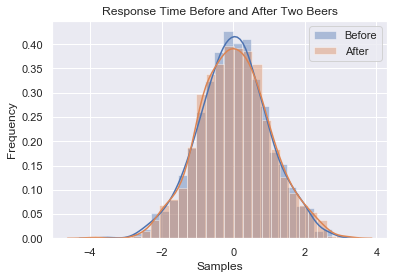

In [112]:
# generate data
response_before = np.random.normal(0, 1, 1000).reshape(-1, 1)
response_after = np.random.normal(0, 1, 1000).reshape(-1, 1)

# random normal distribution
fig, ax = plt.subplots()
sns.distplot(response_before, ax=ax, label="Before")
ax = sns.distplot(response_after, ax=ax, label="After")
ax.legend()
ax.set(xlabel='Samples', ylabel='Frequency', title='Response Time Before and After Two Beers')

In [113]:
# use MGC to perform independence test
u, v = transform_matrices(response_before, response_after)
mgc = MGC()
p_value, p_value_metadata = mgc.p_value(u, v, is_fast=True)

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.2.0-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/mgc/mgc.py:293: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


In [114]:
print("p value:", p_value)
print("test statistic:", p_value_metadata["test_statistic"])

p value: 1.0
test statistic: 0.0005723070062301338


### Case 2:  
Response time before having two beers is less than after having two beers (sampled from different distribution)

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Samples'),
 Text(0.5,1,'Response Time Before and After Two Beers')]

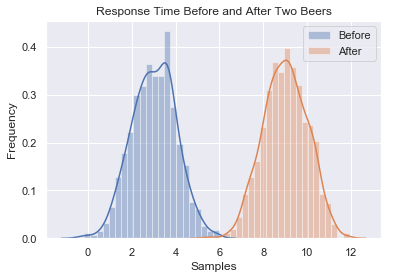

In [115]:
# generate data
response_before = np.random.normal(3, 1, 1000).reshape(-1, 1)
response_after = np.random.normal(9, 1, 1000).reshape(-1, 1)

# random normal distribution
fig, ax = plt.subplots()
sns.distplot(response_before, ax=ax, label="Before")
ax = sns.distplot(response_after, ax=ax, label="After")
ax.legend()
ax.set(xlabel='Samples', ylabel='Frequency', title='Response Time Before and After Two Beers')

In [116]:
# use MGC to perform independence test
u, v = transform_matrices(response_before, response_after)
mgc = MGC()
p_value, p_value_metadata = mgc.p_value(u, v, is_fast=True)

In [117]:
print("p value:", p_value)
print("test statistic:", p_value_metadata["test_statistic"])

p value: 0.0
test statistic: 0.2541963737704732
